## Line Plots with multifacets

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

nuqta = sns.load_dataset('dots')
nuqta
# define a co

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


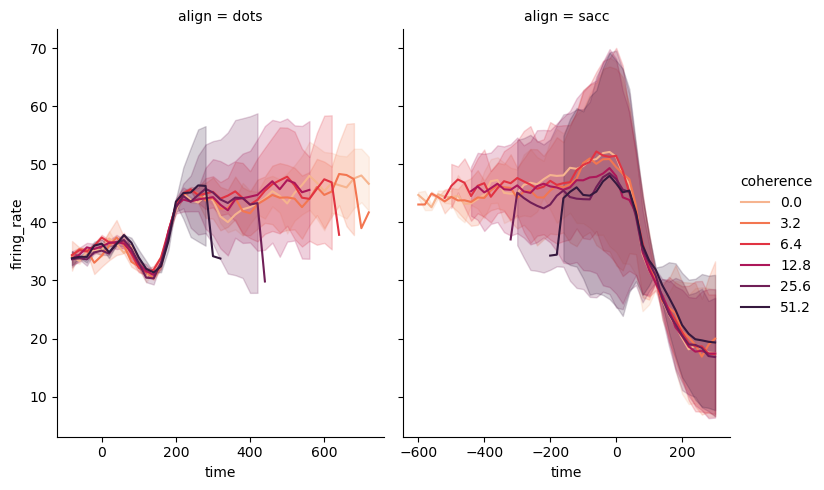

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

nuqta = sns.load_dataset('dots')
# nuqta
# define a color palette

palette = sns.color_palette("rocket_r")

# line pkit

sns.relplot(
    data= nuqta,
    x="time",
    y="firing_rate",
    hue="coherence",
    col="align",
    kind="line",
    size_order=["T1","T2"],
    palette = palette,
    aspect=.75,
    facet_kws=dict(sharex=False)
    
    
)
plt.show()


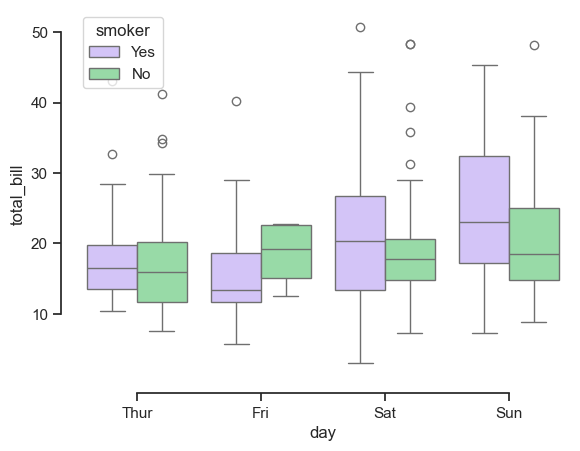

In [18]:
import seaborn as sns
sns.set_theme (style="ticks", palette="pastel")
# Load the example tips dataset
tips = sns.load_dataset("tips")
# Draw a nested boxplot to show bills by day and time
sns.boxplot (x="day", y="total_bill",
hue="smoker", palette=["m", "g"],
data=tips)
sns.despine (offset=10, trim=True)

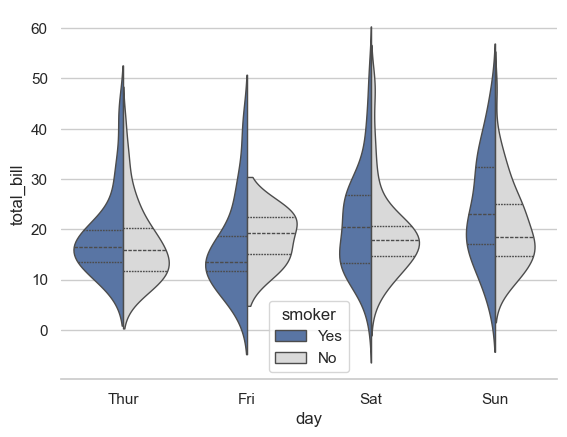

In [34]:
import seaborn as sns
sns.set_theme (style="whitegrid")
# Load the example tips dataset
tips = sns.load_dataset ("tips")
# # Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x="day",y="total_bill",hue="smoker", split=True, inner="quart", linewidth=1, palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)



<Axes: xlabel='carat', ylabel='price'>

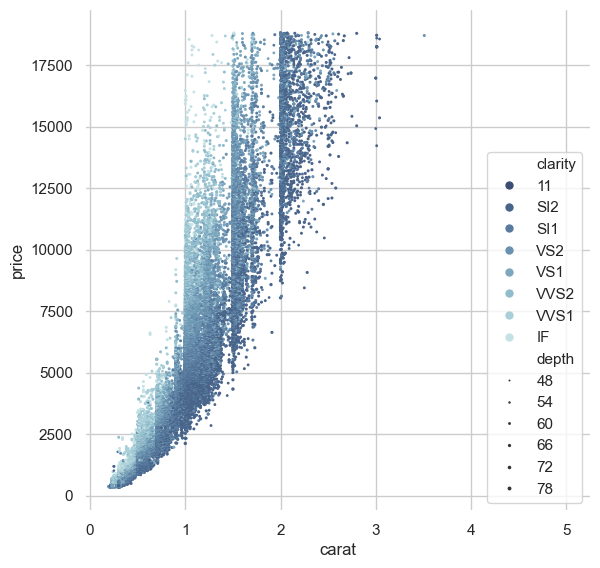

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme (style="whitegrid")
# Load the example diamonds dataset
diamonds = sns.load_dataset ("diamonds")
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots (figsize=(6.5, 6.5))
sns.despine (f, left=True, bottom=True)
clarity_ranking = ["11", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price", hue="clarity",
size="depth", palette="ch:r=-.2,d=.3_r", hue_order=clarity_ranking,
sizes=(1, 8), linewidth=0,
data=diamonds, ax=ax 
               )

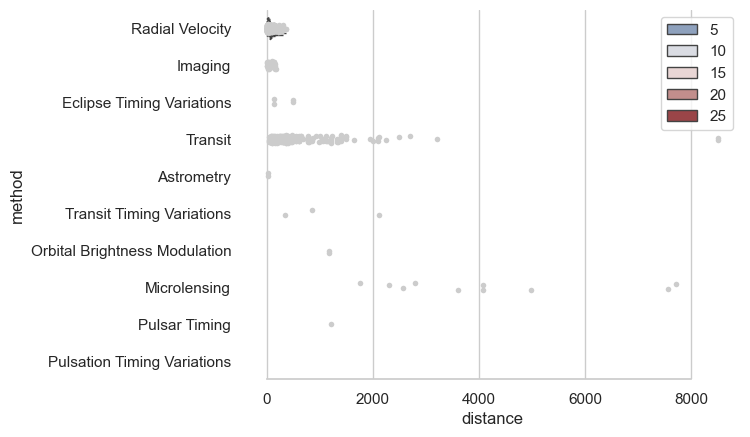

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme (style="whitegrid")
# Load the example diamonds dataset
# Load the example planets dataset
planets = sns.load_dataset("planets")
# planets.head()
# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", hue="mass",data=planets,
whis=[0, 100], width=.6, palette="vlag")
# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
size=4, color=".8", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

AttributeError: 'Legend' object has no attribute 'legendHandles'

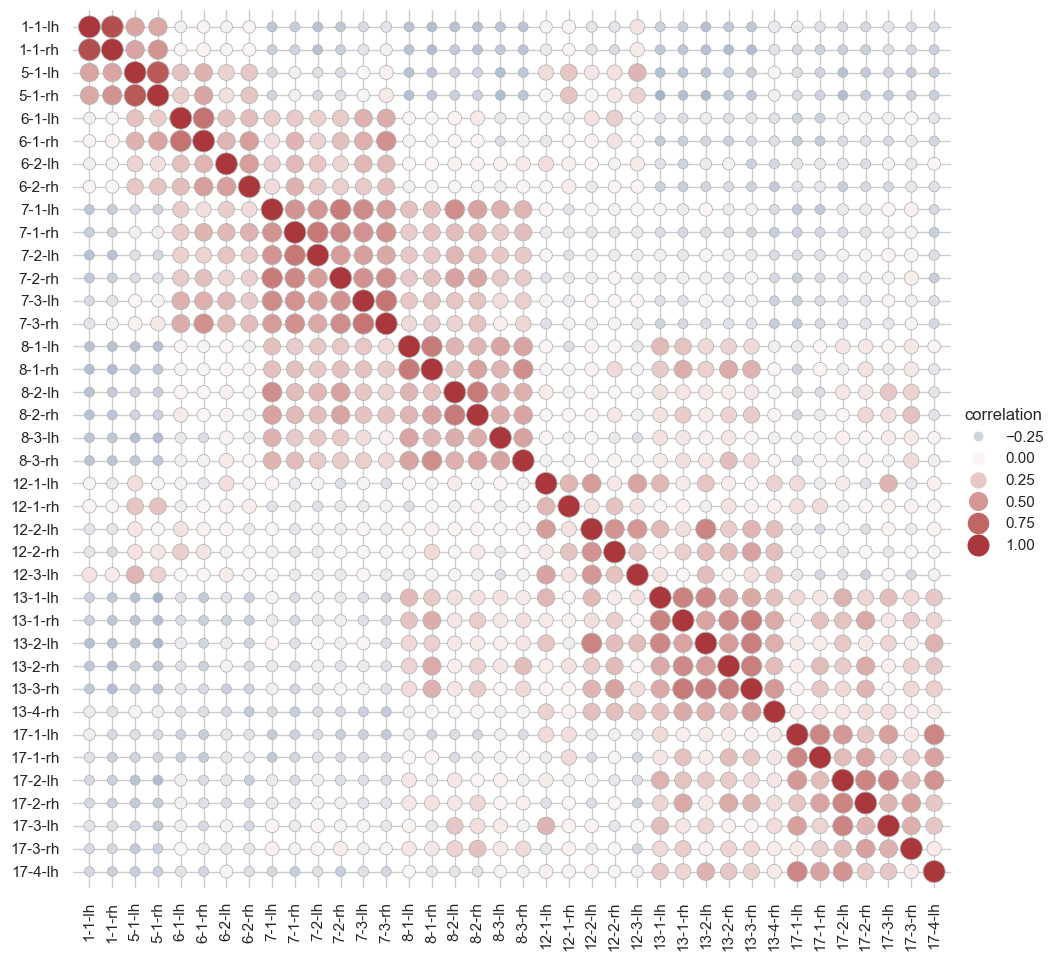

In [92]:
import seaborn as sns
sns.set_theme (style="whitegrid")
# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset ("brain_networks", header=[0, 1, 2], index_col=0)
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                .get_level_values("network")
                .astype(int)
                .isin (used_networks))
df = df.loc[:, used_columns]
df.columns = df.columns.map("-".join)
# Compute a correlation matrix and convert to Long-form
corr_mat = df.corr().stack().reset_index (name="correlation")
# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data = corr_mat, 
    x="level_0", 
    y = "level_1", 
    hue = "correlation", 
    size="correlation",
    palette="vlag", 
    hue_norm=(-1, 1), 
    edgecolor=".7",
    height=10, 
    sizes=(50, 250), 
    size_norm=(-.2, .8),
)
# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine (left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels ():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

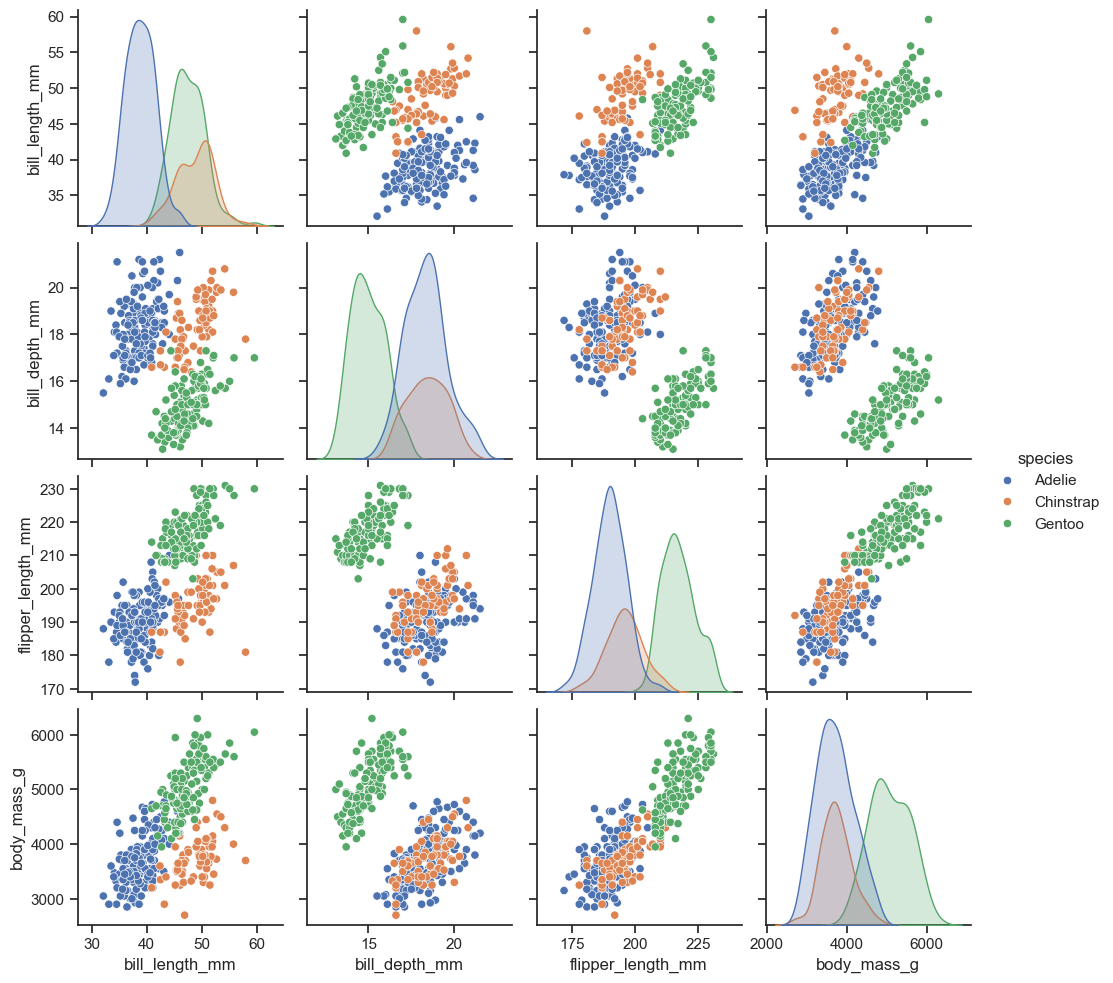

In [94]:
import seaborn as sns
sns.set_theme (style="ticks")
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

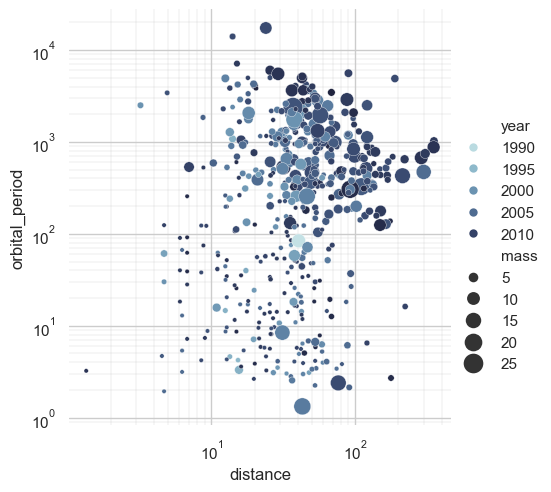

In [102]:
import seaborn as sns
sns.set_theme(style="whitegrid")
# Load the example planets dataset
planets = sns.load_dataset("planets")
cmap = sns.cubehelix_palette (rot=-.2, as_cmap=True)
g = sns.relplot(
data=planets,
x="distance", y="orbital_period",
hue="year", size="mass",
palette = cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine (left=True, bottom=True)

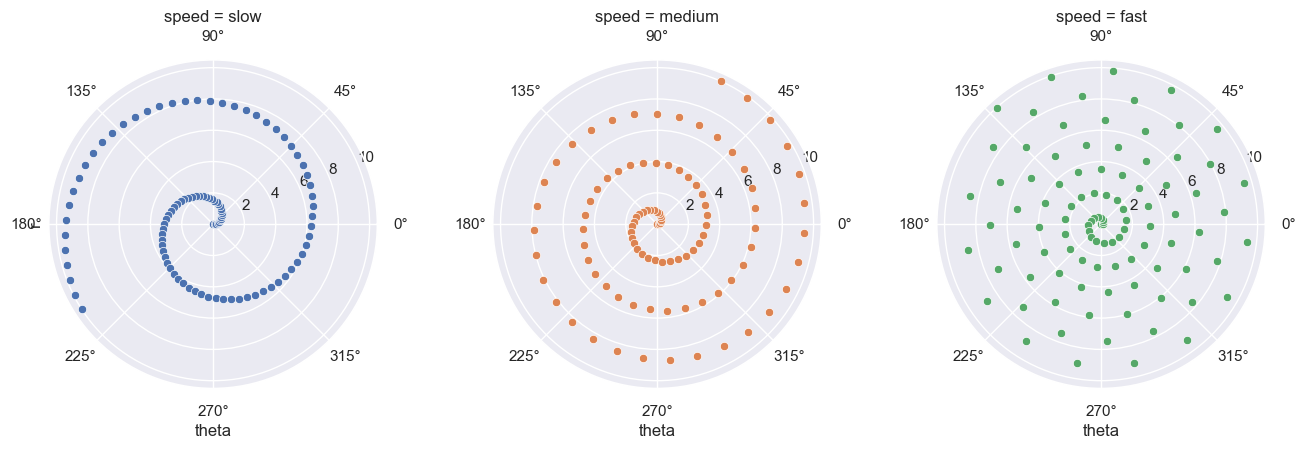

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r })
# Convert the dataframe to Long-form or "tidy" format
df = pd.melt (df, id_vars=['r'], var_name='speed', value_name='theta')
# Set up a grid of axes with a polar projection
g=sns.FacetGrid(df, col="speed", hue="speed",
subplot_kws = dict(projection='polar'), height=4.5,
sharex=False, sharey=False, despine=False)
# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "r")